# Decoding Customer Voices: AI-Powered Sentiment Analysis for Fashion & Tech

## 1. Introduction and Problem Statement:

In today’s digital age, brands are constantly discussed across platforms such as Twitter, Instagram, and product review sites. However, understanding the sentiments behind these conversations remains a major challenge. Businesses often struggle to interpret whether public opinion leans positively, negatively, or neutrally towards their brand. Without a reliable system to analyze this feedback, companies may miss out on crucial insights that could help improve customer satisfaction, address issues proactively, or tailor marketing strategies effectively.

To address this problem we are developing an accurate and scalable sentiment analysis system that can automatically interpret and categorize public opinions from diverse digital platforms.

## 2. Proposed Solution:

Collect and preprocess large volumes of social media post reviews.

 We used the following three models for efficient batch prediction on the product sentiment analysis task:

1. LSTM Model  
   A recurrent neural network model that captures sequential dependencies in text for sentiment classification.

2. Google Cloud Natural Language API  
   A cloud-based NLP service that provides pre-trained sentiment analysis capabilities.

3. BERT-Based Model  
   A transformer-based model fine-tuned for sentiment classification, offering contextual understanding of product reviews.

Visualize sentiment trends using an interactive dashboard developed with Looker Studio.
This enables brands to gain real-time insights into customer perceptions, improve product strategies, and enhance user engagement.

#### 2.1 Dataset

These are the following dataset we have used for our project

1. [fashionova_dataset](https://drive.google.com/file/d/17eodoyp2YYw51BMOXGJEzCgJcC2gkClp/view?usp=sharing) 

2. [fashionova_cleaned_dataset](https://drive.google.com/file/d/1MnfPvZUEmHNmoQdHzmdjN5SFTFganLPh/view?usp=sharing)

4. [airpod_reviews_dataset](https://drive.google.com/file/d/10Kj4R736zupZ5bbXBv8jan8xb0hLrTzB/view?usp=sharing)

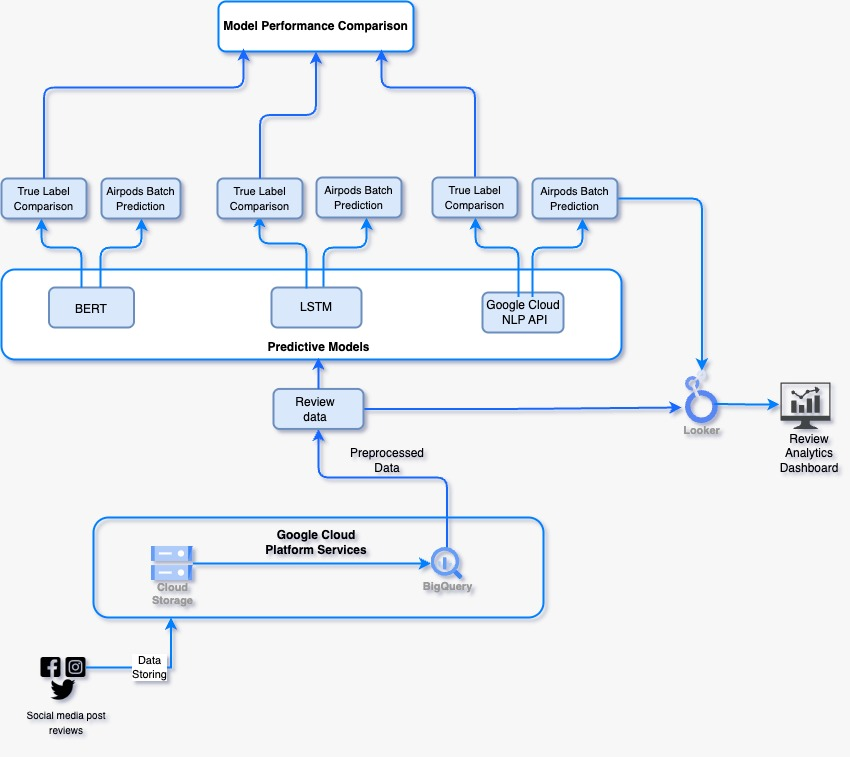

In [1]:
from IPython.display import Image
Image(filename='/kaggle/input/newdiagram/flowchart.jpg')

                   Fig1: Proposed System Architecture Diagram

## 3. System Development Approach

The project adopts a cloud-native architecture leveraging Google Cloud Platform (GCP) services for end-to-end sentiment analysis. The following tools and technologies were used:

**Google Cloud Storage (GCS):** Used to store both raw and preprocessed datasets, ensuring scalable and secure data access.

**BigQuery:** Employed for efficient data querying, transformation, and exploratory analysis of large-scale datasets.

**Vertex AI Workbench:** Served as the primary environment for model development and experimentation. JupyterLab instances were used within the workbench for coding, training, and comparing machine learning models.

**Python:** The core programming language used for development, in conjunction with libraries such as Pandas for data manipulation, Scikit-learn for machine learning tasks, tensorflow for building lstm model, transformers library for using pretrained bert model and NLTK for natural language processing.

**Looker Studio:** Utilized to create an interactive sentiment dashboard for visualizing insights derived from social media posts and customer reviews.

In [1]:
import numpy as np
import pandas as pd
import os

# List all files in the Kaggle input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fashionova/fashion nova.csv
/kaggle/input/original/707 rows_1.csv
/kaggle/input/neutral/only neutral.csv
/kaggle/input/batch1/batch_prediction (3).csv
/kaggle/input/jsonkey/qwiklabs-gcp-02-f897b9b120ed-3a159bf96366.json
/kaggle/input/newdiagram/flowchart.jpg
/kaggle/input/newkey1/qwiklabs-gcp-02-6f13eb55780e-279829ccad8e.json
/kaggle/input/jsonkey1/qwiklabs-gcp-04-2833f2969520-887299fc5790.json
/kaggle/input/keyyy2/qwiklabs-gcp-02-b0bd20061321-fd8a389ab3c0.json
/kaggle/input/lstm_new/keras/default/1/lstm_new.keras
/kaggle/input/playgr/playstore2.csv
/kaggle/input/keyy-3/qwiklabs-gcp-03-97091f86a470-449fb487eae0.json
/kaggle/input/reviewdata/airpods_reviews.csv
/kaggle/input/nlpapi/sentimentanalysis-456005-c6bfb264a02f.json
/kaggle/input/fashionnova-final/final_cleaned.csv
/kaggle/input/fashion-nova/cleaned_dataset.csv
/kaggle/input/bigquery/table_cleaning.png
/kaggle/input/bigquery/sentiment_balanced.png
/kaggle/input/bigquery/sentiment_count.png
/kaggle/input/bigquery/se

## 4. System Implementation and Data Pipeline

This section outlines the tools, technologies, and processes involved in implementing the sentiment analysis system, including data preprocessing, model development and model evaluation.


#### 4.1 Data Preprocessing Using Google BigQuery

Google BigQuery is a fully-managed, serverless data warehouse provided by Google Cloud Platform (GCP) that allows for fast SQL-like querying over large datasets.



Step 1: This query retrieves all rows and columns from the table named **original_table** located inside the **text_preprocess** dataset of the project **qwiklabs-gcp-03-97091f86a470**

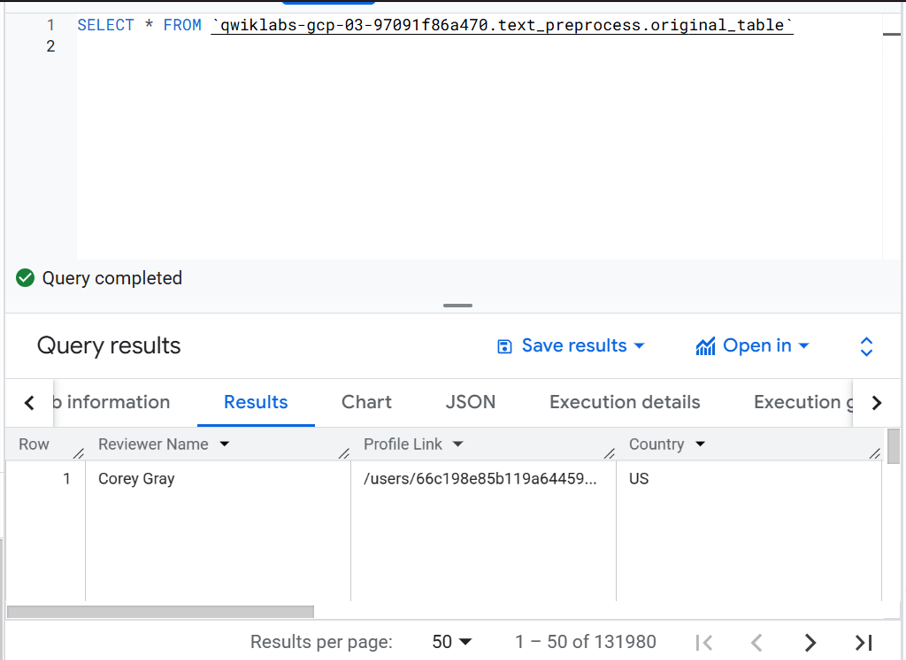

Step 2: The raw text data was cleaned and transformed. This included extracting numeric values, formatting dates, and renaming columns to prepare the dataset for analysis.

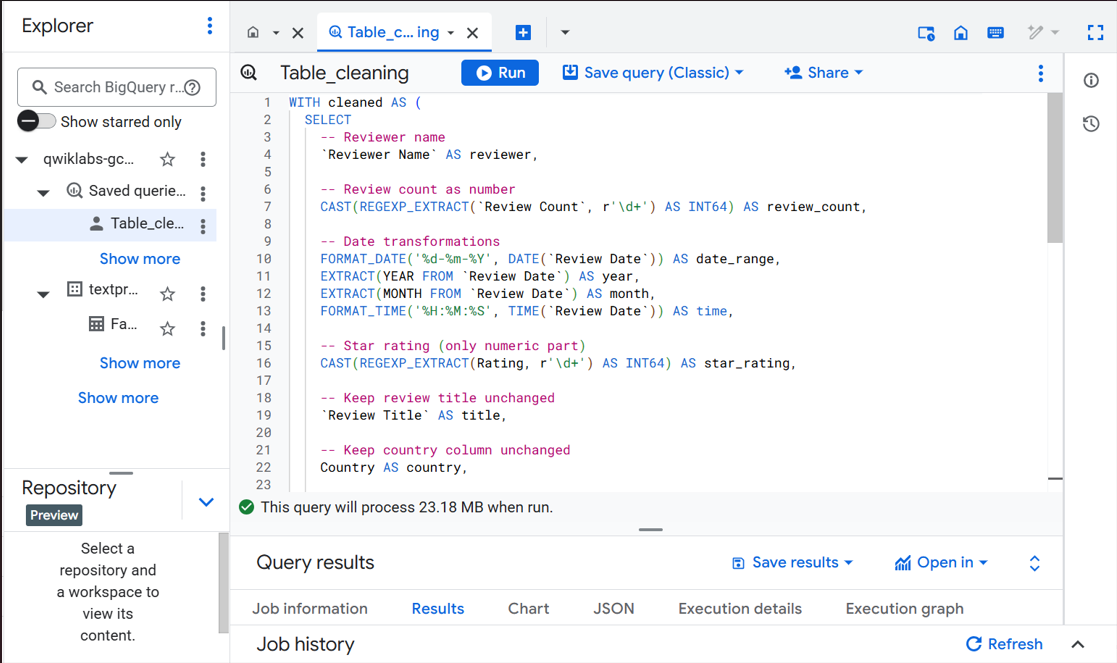

Step 3: A sentiment column was added to the cleaned dataset. Based on star ratings, reviews were labeled as **'Positive' (4 & 5 stars) or 'Negative' (1 & 2 stars)**, while ratings with a value of 3 were excluded due to poor data quality to support sentiment analysis. 

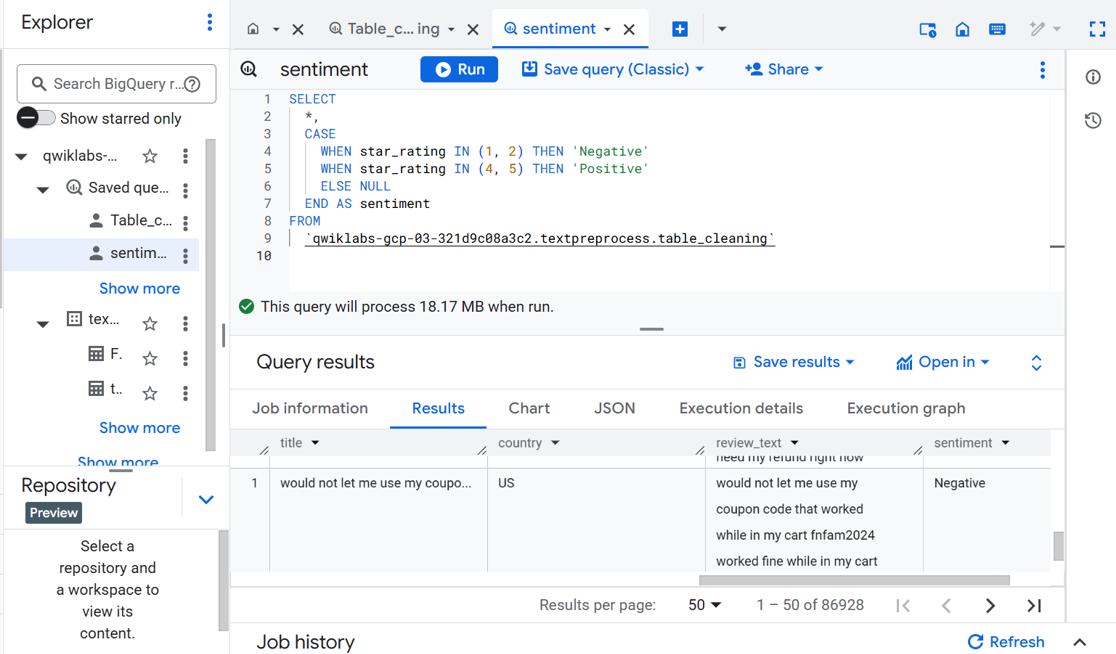

Step 4: Sentiment counts were calculated using COUNTIF, resulting in 72,466 positive and 14,462 negative reviews.

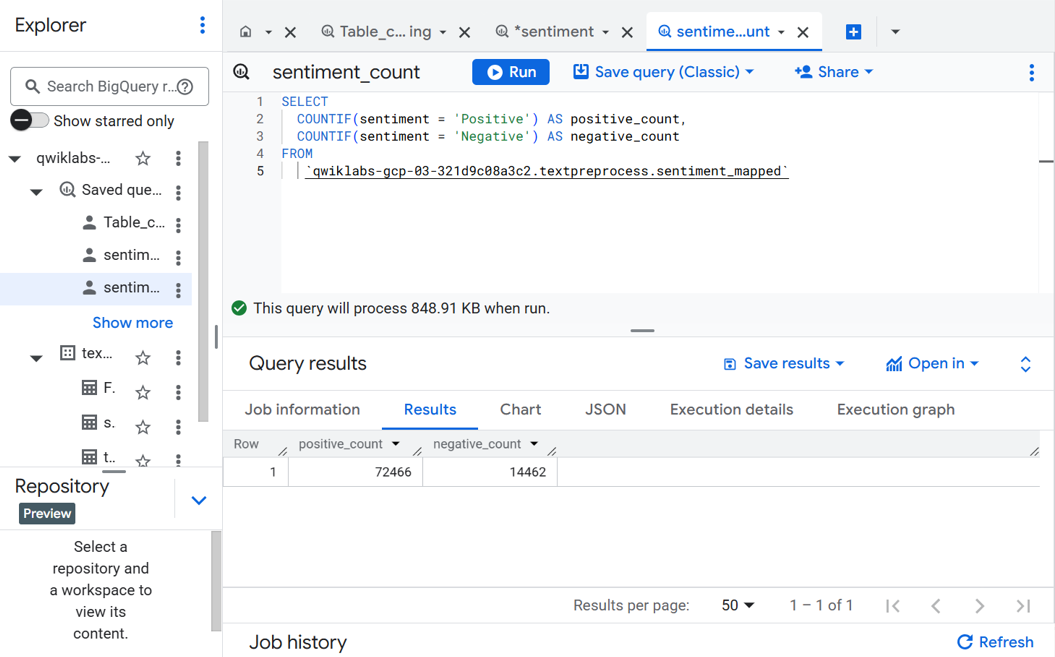

Step 5: A balanced dataset was created by limiting positive reviews to match the count of negative ones. The two subsets were combined using UNION ALL and shuffled with ORDER BY RAND() for model training.

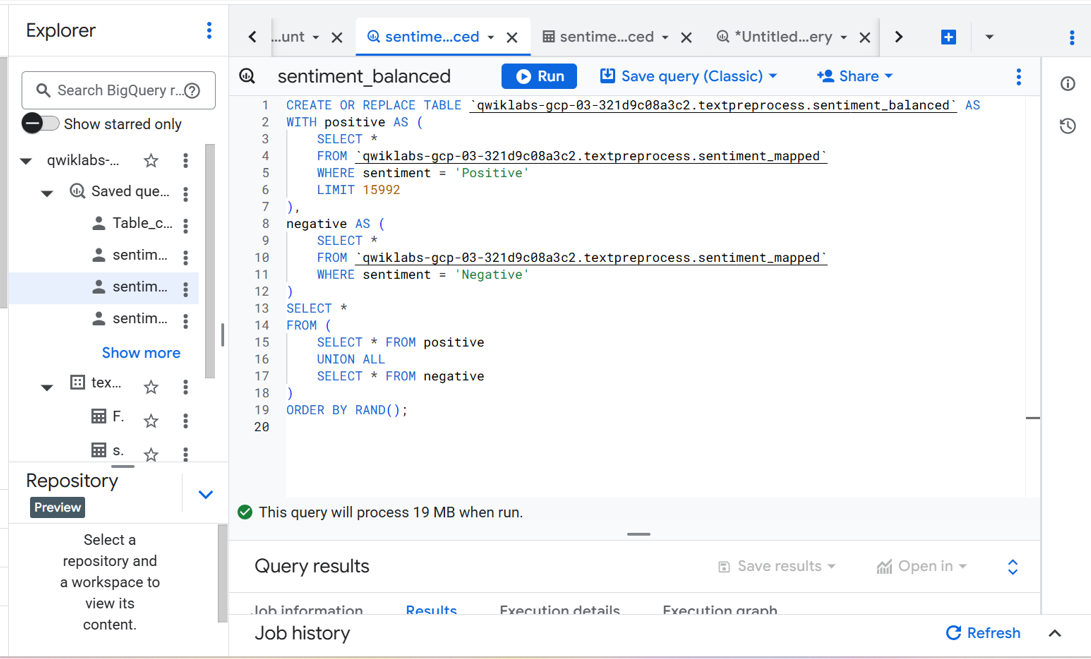

Step 6: Stopwords and extra spaces were removed from the review text using nested REGEXP_REPLACE functions. The cleaned text was saved in a new table named sentiment_balanced_cleaned.

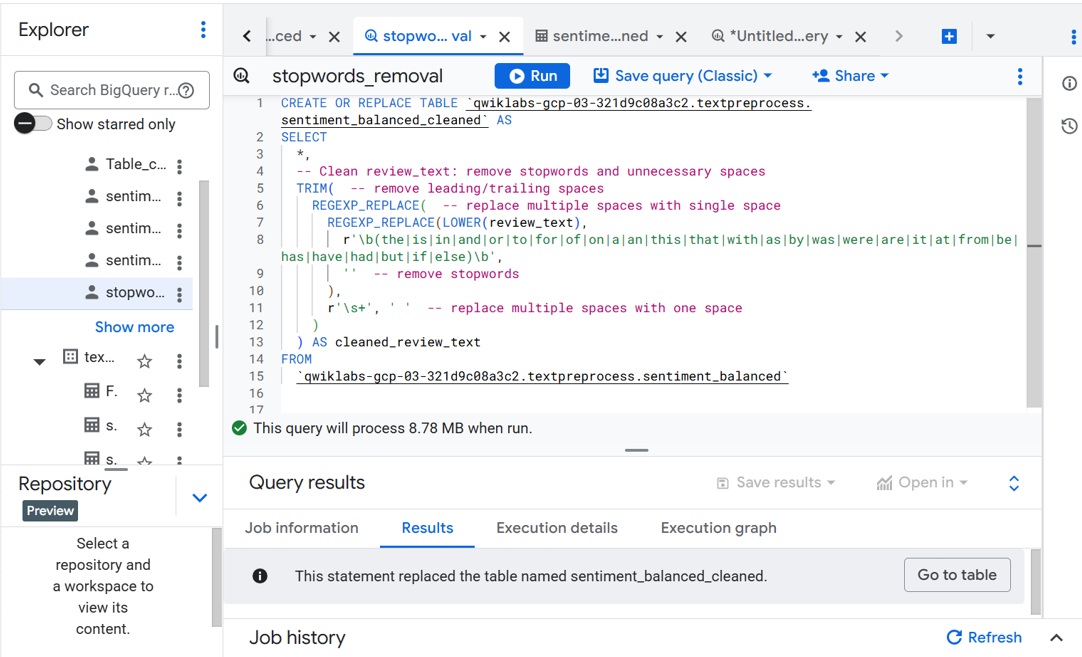

## 5. Implemented sentiment analysis using Google Cloud's Vertex AI Workbench (JupyterLab environment) to leverage NLP APIs and manage model workflows.

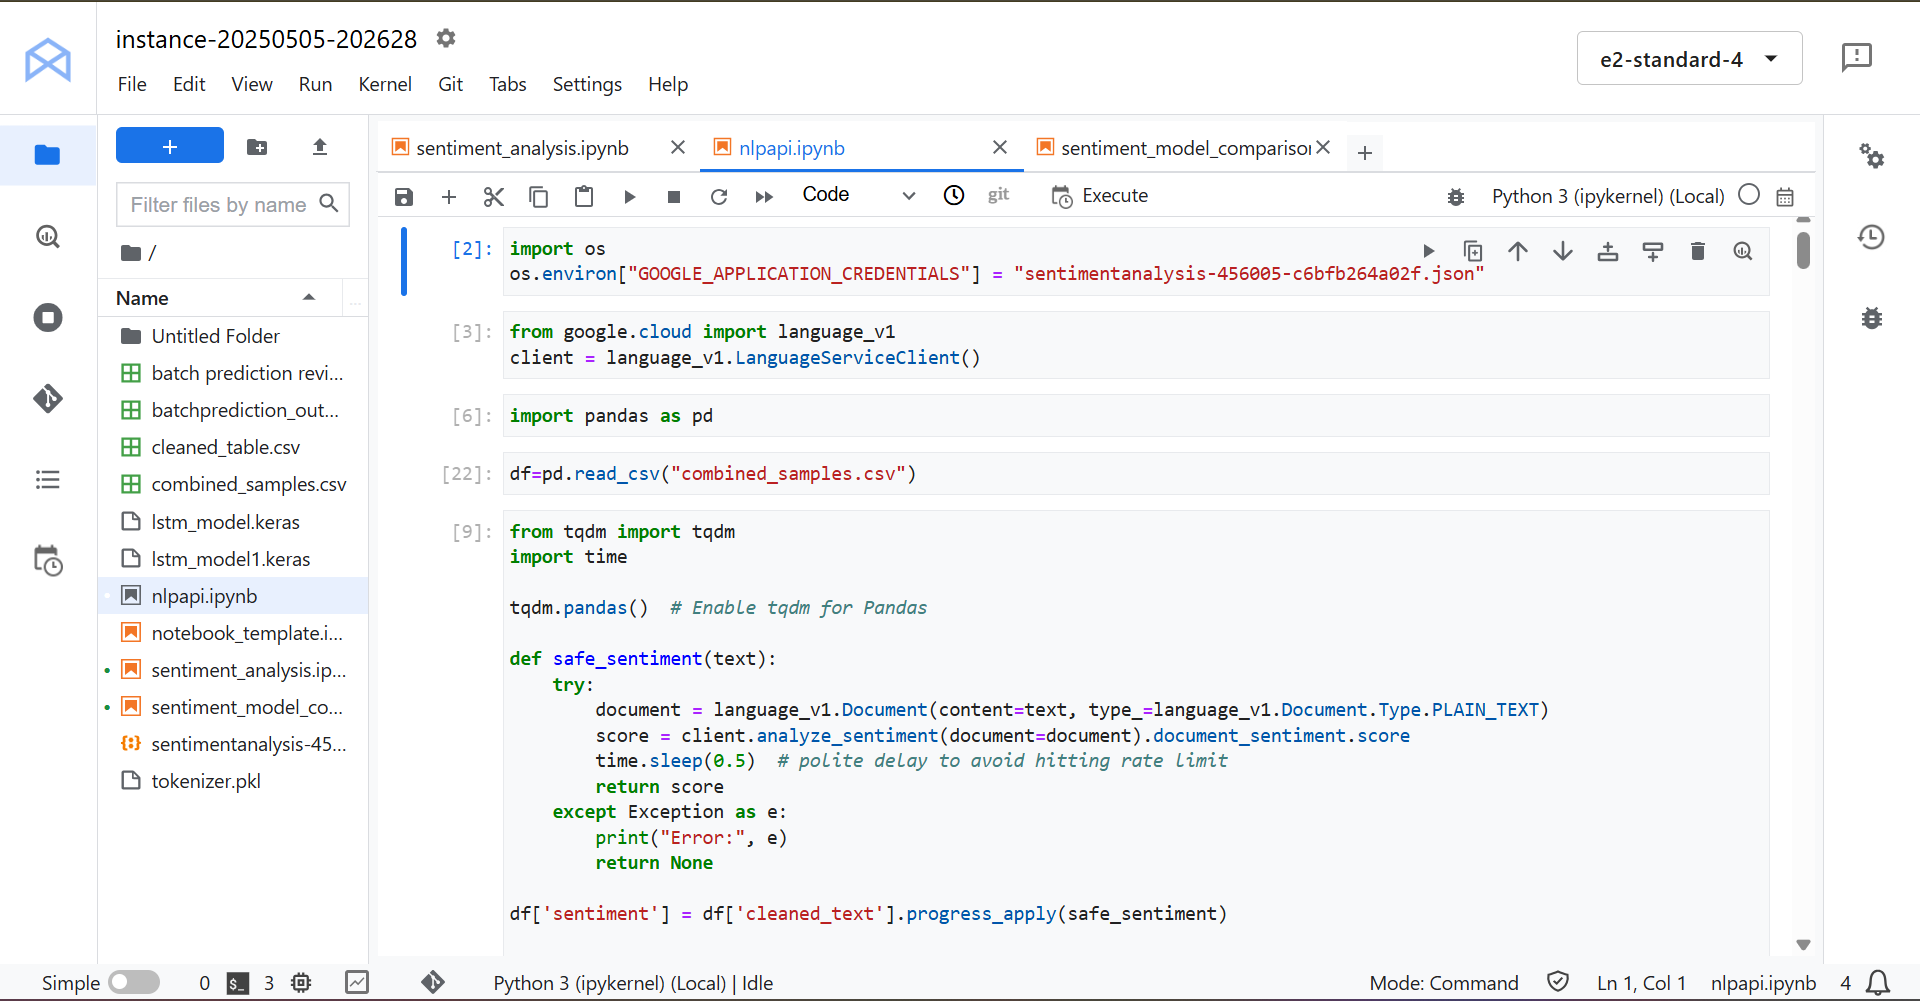

## 6. LSTM Model for Sentiment Analysis of Post Reviews

In [2]:
#importing libraries
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("/kaggle/input/fashionnova-final/final_cleaned.csv")

In [3]:
df.shape

(30454, 11)

In [4]:
df.head()

,reviewer,review_count,date_range,year,month,time,star_rating,title,country,sentiment,cleaned_review_text
0,Maddi W,1,2016-12-08,2016,12,17:56:58,1,Poor Customer Service,US,Negative,reading through these reviews i am very disapp...
1,Ashley,1,2016-12-10,2016,12,10:45:06,1,False advertising and terrible customer service,US,Negative,company advertises social media their website ...
2,Bekie Skye,1,2016-12-15,2016,12,05:38:29,1,Never received my package!!,CA,Negative,hello i ordered them over month ago still not ...
3,Shanice Powis,1,2016-12-27,2016,12,19:50:31,1,My order is in the wrong location (fashion nova),GB,Negative,i ordered uk i got email saying i can track my...
4,Selma Barat,1,2017-07-08,2017,7,22:26:36,1,The reviews on their website is all …,US,Negative,reviews their website all fake they steal your...


In [5]:
df = df[['sentiment','cleaned_review_text']]

In [6]:
df.to_csv("cleaned_dataset.csv")

In [7]:
df['sentiment'].value_counts()

sentiment
Positive    15992
Negative    14462
Name: count, dtype: int64

In [8]:
# Install missing if needed
import pandas as pd
import numpy as np
import re
import emoji
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/kaggle/input/final-cleaned/cleaned_dataset.csv")

# Drop rows with missing cleaned text
df.dropna(subset=['cleaned_review_text'], inplace=True)

# Encode target labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])  # 'positive'->1, 'negative'->0

# Prepare data
X = df['cleaned_review_text'].values
y = df['label'].values

# Tokenization
vocab_size = 10000  # you can tune this
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Padding
max_length = 100  # based on average review length
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build Model with Dropout & L2 Regularization
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.001))),  # L2 Regularization
    Dropout(0.4),  # Dropout to reduce overfitting
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # Regularized dense layer
    Dropout(0.3),
    Dense(2, activation='softmax')  # Binary classification
])

# Compile
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=1e-6)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)



Epoch 1/10


I0000 00:00:1750920687.252214      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750920687.253017      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
I0000 00:00:1750920693.704697     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


761/761 - 17s - 22ms/step - accuracy: 0.9069 - loss: 0.2998 - val_accuracy: 0.9371 - val_loss: 0.2065 - learning_rate: 0.0010
Epoch 2/10
761/761 - 9s - 12ms/step - accuracy: 0.9499 - loss: 0.1747 - val_accuracy: 0.9369 - val_loss: 0.1924 - learning_rate: 0.0010
Epoch 3/10
761/761 - 8s - 11ms/step - accuracy: 0.9579 - loss: 0.1469 - val_accuracy: 0.9310 - val_loss: 0.2027 - learning_rate: 0.0010
Epoch 4/10
761/761 - 9s - 11ms/step - accuracy: 0.9671 - loss: 0.1183 - val_accuracy: 0.9348 - val_loss: 0.2034 - learning_rate: 5.0000e-04


In [9]:
# Evaluate
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {acc:.4f}, Validation Loss: {loss:.4f}")

Validation Accuracy: 0.9369, Validation Loss: 0.1924


In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Example new sentence
new_text = ["Not the best I've used, but still gets the job done wonderfully."]  # replace with your sentence

# Step 1: Text to sequence
new_seq = tokenizer.texts_to_sequences(new_text)

# Step 2: Pad sequence (must match training sequence length)
maxlen = X_train.shape[1]  # Get the maxlen used during training
new_padded = pad_sequences(new_seq, maxlen=maxlen, padding='post')

# Step 3: Predict
prediction = model.predict(new_padded)
predicted_class = np.argmax(prediction, axis=1)  # Get class with highest probability

print("Prediction probabilities:", prediction)
print("Predicted class:", predicted_class[0])  # 0- negative, 1- positive depending on your classes


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Prediction probabilities: [[0.1346997 0.8653003]]
Predicted class: 1


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics import accuracy_score  # for accuracy calculation

# Example list of new sentences
new_texts =[ "Absolutely fantastic! Exceeded all my expectations – highly recommend!",
    "Great quality and attention to detail. I’ll definitely be coming back for more.",
    "Exceptional customer service and super fast delivery – couldn’t be happier!",
    "The product works exactly as described, and even better than I hoped!",
    "A flawless experience from start to finish. Truly impressed!",
    "Top-notch! The team was professional, responsive, and very helpful.",
    "I’ve tried many, but this one stands out for its quality and value.",
    "Every feature was thoughtfully designed. It’s clear a lot of care went into this.",
    "I’m very satisfied with my purchase – everything was smooth and easy.",
    "Highly reliable and well-made. This will definitely be my go-to from now on."
]

# True classes for the above texts (example: 0=Negative, 1=Positive)
true_classes = [1]* 10 # Replace with your actual labels

# Step 1: Texts to sequences
new_seqs = tokenizer.texts_to_sequences(new_texts)

# Step 2: Pad sequences (must match training sequence length)
maxlen = X_train.shape[1]  # Same as training
new_padded = pad_sequences(new_seqs, maxlen=maxlen, padding='post')

# Step 3: Predict
predictions = model.predict(new_padded)
predicted_classes = np.argmax(predictions, axis=1)  # Class with highest probability

# Step 4: Print results for each sentence
for i, text in enumerate(new_texts):
    print(f"Review: {text}")
    print(f"Prediction Probabilities: {predictions[i]}")
    print(f"Predicted Class: {predicted_classes[i]}  |  True Class: {true_classes[i]}")
    print("-" * 50)

# Step 5: Calculate and print overall accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
Review: Absolutely fantastic! Exceeded all my expectations – highly recommend!
Prediction Probabilities: [0.01353385 0.9864661 ]
Predicted Class: 1  |  True Class: 1
--------------------------------------------------
Review: Great quality and attention to detail. I’ll definitely be coming back for more.
Prediction Probabilities: [0.00746038 0.9925396 ]
Predicted Class: 1  |  True Class: 1
--------------------------------------------------
Review: Exceptional customer service and super fast delivery – couldn’t be happier!
Prediction Probabilities: [0.07129619 0.9287038 ]
Predicted Class: 1  |  True Class: 1
--------------------------------------------------
Review: The product works exactly as described, and even better than I hoped!
Prediction Probabilities: [0.10574259 0.8942574 ]
Predicted Class: 1  |  True Class: 1
--------------------------------------------------
Review: A flawless experience from start to finish. Truly impressed!
Prediction 

In [12]:
import matplotlib.pyplot as plt


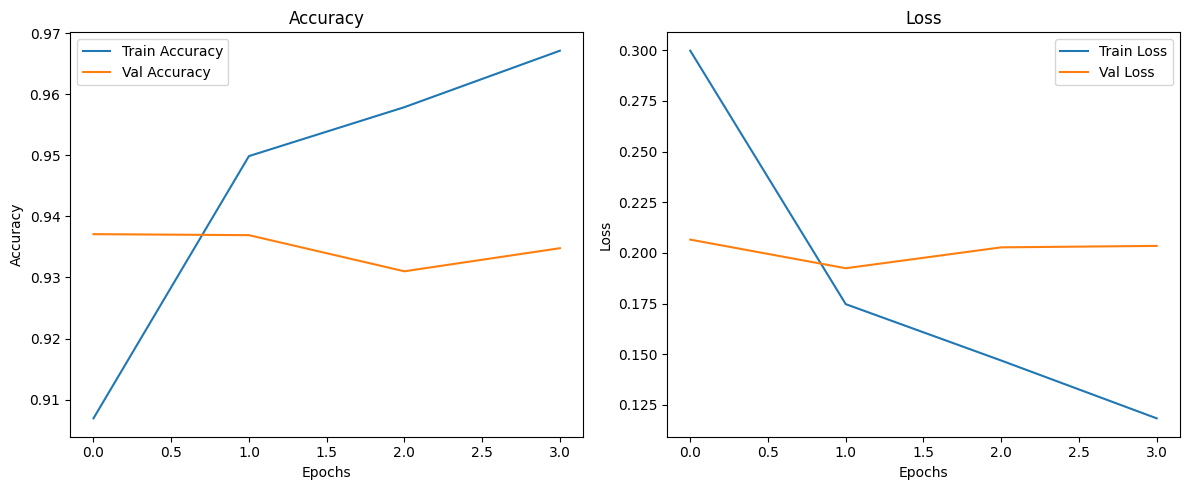

In [13]:
# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
#Saving model
model.save("lstm_new.keras")

In [15]:
import joblib

# Save the tokenizer object to a file
joblib.dump(tokenizer, 'tokenizer.pkl')


['tokenizer.pkl']

## 7. Web Scraping and Preprocessing of Amazon Apple AirPod Reviews for Batch Sentiment Prediction

Note: We have already scraped reviews for apple airpod ([airpod_reviews_data](https://drive.google.com/file/d/1zAzr-ZixDPAKD7U7ygJ3hg1MpDZV9FIQ/view?usp=sharing)) 
The link of the review scraper code is given below.

[web_scraping_code](https://drive.google.com/file/d/1l0t5Km6uU1_NO4PiPwkgZztl0fDdzQA6/view?usp=sharing)


In [16]:
import pandas as pd 
#Loading scraped data
df1 = pd.read_csv("/kaggle/input/reviewdata/airpods_reviews.csv")

In [17]:
df1.head()

,title,rating,review,date,author
0,Unmatched Audio Excellence: Apple AirPods Pro ...,5.0 out of 5 stars,I recently upgraded to the Apple AirPods Pro (...,Reviewed in India on 17 December 2023,Naidu
1,An Immersive Audio Experience,5.0 out of 5 stars,"As an avid music lover and tech enthusiast, I ...",Reviewed in India on 21 July 2023,Sadashiv B Malannavar
2,I phone,5.0 out of 5 stars,Loved the productSound quality superb,Reviewed in India on 11 April 2025,Shrishty Dixit
3,Almost perfect!,4.0 out of 5 stars,"When we buy any TWS, we have these checkpoints...",Reviewed in India on 12 October 2022,Sudhakar N S
4,Received a genuine Apple product!,5.0 out of 5 stars,Finally got my hands on the Apple AirPods Pro ...,Reviewed in India on 8 February 2024,kunal wadhwa


In [18]:
df1.shape

(100, 5)

In [19]:

# Extract date from the 'date' column using regex
df1['rating_date'] = df1['date'].str.extract(r'(\d{1,2} \w+ \d{4})')[0]

# Convert the extracted string to datetime
df1['rating_date'] = pd.to_datetime(df1['rating_date'], format="%d %B %Y", errors='coerce')

# (Optional) Drop the original messy 'date' column
df1.drop(columns=['date'], inplace=True)

# Show cleaned data
print(df1.head())

                                               title              rating  \
0  Unmatched Audio Excellence: Apple AirPods Pro ...  5.0 out of 5 stars   
1                      An Immersive Audio Experience  5.0 out of 5 stars   
2                                            I phone  5.0 out of 5 stars   
3                                    Almost perfect!  4.0 out of 5 stars   
4                  Received a genuine Apple product!  5.0 out of 5 stars   

                                              review                 author  \
0  I recently upgraded to the Apple AirPods Pro (...                  Naidu   
1  As an avid music lover and tech enthusiast, I ...  Sadashiv B Malannavar   
2              Loved the productSound quality superb         Shrishty Dixit   
3  When we buy any TWS, we have these checkpoints...           Sudhakar N S   
4  Finally got my hands on the Apple AirPods Pro ...           kunal wadhwa   

  rating_date  
0  2023-12-17  
1  2023-07-21  
2  2025-04-11  
3  2

In [20]:
# Show results
print(df1[['review', 'rating_date']].head())

                                              review rating_date
0  I recently upgraded to the Apple AirPods Pro (...  2023-12-17
1  As an avid music lover and tech enthusiast, I ...  2023-07-21
2              Loved the productSound quality superb  2025-04-11
3  When we buy any TWS, we have these checkpoints...  2022-10-12
4  Finally got my hands on the Apple AirPods Pro ...  2024-02-08


In [21]:
# Extract the number eg: 5.0 from '5.0 out of 5 stars' from ratings column
df1['star_rating'] = df1['rating'].str.extract(r'^(\d+\.\d+)').astype(float)
df1.head()

,title,rating,review,author,rating_date,star_rating
0,Unmatched Audio Excellence: Apple AirPods Pro ...,5.0 out of 5 stars,I recently upgraded to the Apple AirPods Pro (...,Naidu,2023-12-17,5.0
1,An Immersive Audio Experience,5.0 out of 5 stars,"As an avid music lover and tech enthusiast, I ...",Sadashiv B Malannavar,2023-07-21,5.0
2,I phone,5.0 out of 5 stars,Loved the productSound quality superb,Shrishty Dixit,2025-04-11,5.0
3,Almost perfect!,4.0 out of 5 stars,"When we buy any TWS, we have these checkpoints...",Sudhakar N S,2022-10-12,4.0
4,Received a genuine Apple product!,5.0 out of 5 stars,Finally got my hands on the Apple AirPods Pro ...,kunal wadhwa,2024-02-08,5.0


In [22]:
#Cleaning review text column
import re

def clean_review_text(text):
    if pd.isna(text):
        return ""
    # Remove newline characters and strip spaces
    text = text.replace("\n", " ")
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

df1['cleaned_review_text'] = df1['review'].apply(clean_review_text)
df1

,title,rating,review,author,rating_date,star_rating,cleaned_review_text
0,Unmatched Audio Excellence: Apple AirPods Pro ...,5.0 out of 5 stars,I recently upgraded to the Apple AirPods Pro (...,Naidu,2023-12-17,5.0,I recently upgraded to the Apple AirPods Pro (...
1,An Immersive Audio Experience,5.0 out of 5 stars,"As an avid music lover and tech enthusiast, I ...",Sadashiv B Malannavar,2023-07-21,5.0,"As an avid music lover and tech enthusiast, I ..."
2,I phone,5.0 out of 5 stars,Loved the productSound quality superb,Shrishty Dixit,2025-04-11,5.0,Loved the productSound quality superb
3,Almost perfect!,4.0 out of 5 stars,"When we buy any TWS, we have these checkpoints...",Sudhakar N S,2022-10-12,4.0,"When we buy any TWS, we have these checkpoints..."
4,Received a genuine Apple product!,5.0 out of 5 stars,Finally got my hands on the Apple AirPods Pro ...,kunal wadhwa,2024-02-08,5.0,Finally got my hands on the Apple AirPods Pro ...
...,...,...,...,...,...,...,...
95,Airpods pro#2,4.0 out of 5 stars,Authentic product with a instant deliveryThe s...,MARUTHI Reddy,2023-10-12,4.0,Authentic product with a instant deliveryThe s...
96,Not happy with the purchase from Amazon,3.0 out of 5 stars,I had purchased AirPods Pro 2nd Gen from Amazo...,Saurabh Acharekar,2023-11-04,3.0,I had purchased AirPods Pro 2nd Gen from Amazo...
97,Expensive but best,4.0 out of 5 stars,I have no word for this amazing product ☺️,Saurabh Acharekar,2024-01-22,4.0,I have no word for this amazing product ☺️
98,Style statement,3.0 out of 5 stars,These are good yesAre these 21000 good noDo th...,Shantz,2023-12-05,3.0,These are good yesAre these 21000 good noDo th...


In [23]:
#Removing emojis and special characters
import re
import pandas as pd

def clean_review_text(text):
    if pd.isna(text):
        return ""
    
    # Remove newline characters and excess spaces
    text = text.replace("\n", " ")
    text = re.sub(r'\s+', ' ', text)

    # Remove emojis using regex pattern
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002700-\U000027BF"  # dingbats
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # Remove special characters (keep letters, numbers, and basic punctuation)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)

    return text.strip()

# Apply cleaning
df1['cleaned_review_text'] = df1['review'].apply(clean_review_text)
df1

,title,rating,review,author,rating_date,star_rating,cleaned_review_text
0,Unmatched Audio Excellence: Apple AirPods Pro ...,5.0 out of 5 stars,I recently upgraded to the Apple AirPods Pro (...,Naidu,2023-12-17,5.0,I recently upgraded to the Apple AirPods Pro 2...
1,An Immersive Audio Experience,5.0 out of 5 stars,"As an avid music lover and tech enthusiast, I ...",Sadashiv B Malannavar,2023-07-21,5.0,"As an avid music lover and tech enthusiast, I ..."
2,I phone,5.0 out of 5 stars,Loved the productSound quality superb,Shrishty Dixit,2025-04-11,5.0,Loved the productSound quality superb
3,Almost perfect!,4.0 out of 5 stars,"When we buy any TWS, we have these checkpoints...",Sudhakar N S,2022-10-12,4.0,"When we buy any TWS, we have these checkpoints..."
4,Received a genuine Apple product!,5.0 out of 5 stars,Finally got my hands on the Apple AirPods Pro ...,kunal wadhwa,2024-02-08,5.0,Finally got my hands on the Apple AirPods Pro ...
...,...,...,...,...,...,...,...
95,Airpods pro#2,4.0 out of 5 stars,Authentic product with a instant deliveryThe s...,MARUTHI Reddy,2023-10-12,4.0,Authentic product with a instant deliveryThe s...
96,Not happy with the purchase from Amazon,3.0 out of 5 stars,I had purchased AirPods Pro 2nd Gen from Amazo...,Saurabh Acharekar,2023-11-04,3.0,I had purchased AirPods Pro 2nd Gen from Amazo...
97,Expensive but best,4.0 out of 5 stars,I have no word for this amazing product ☺️,Saurabh Acharekar,2024-01-22,4.0,I have no word for this amazing product
98,Style statement,3.0 out of 5 stars,These are good yesAre these 21000 good noDo th...,Shantz,2023-12-05,3.0,These are good yesAre these 21000 good noDo th...


In [24]:
df2 = df1[['star_rating', 'rating_date', 'cleaned_review_text']]
df2.head()

,star_rating,rating_date,cleaned_review_text
0,5.0,2023-12-17,I recently upgraded to the Apple AirPods Pro 2...
1,5.0,2023-07-21,"As an avid music lover and tech enthusiast, I ..."
2,5.0,2025-04-11,Loved the productSound quality superb
3,4.0,2022-10-12,"When we buy any TWS, we have these checkpoints..."
4,5.0,2024-02-08,Finally got my hands on the Apple AirPods Pro ...


In [25]:
#Saving cleaned airpod reviews data
df2.to_csv('airpodcleanedtable.csv', index= None)

In [26]:
#Saving the review text
df3=df2[['cleaned_review_text']]
df3.to_csv('batch_prediction.csv', index = None)


## 8. Batch Prediction for Apple Airpod Reviews

### 8.1 Batch Sentiment Prediction using Google Cloud NLP API

In [27]:
# Load Google Cloud service account credentials from a JSON key file 
# to authenticate access to the Cloud NLP API

import json

with open('/kaggle/input/keyjson/qwiklabs-gcp-00-7bc8fc9eff74-e632fd35e19f.json', 'r') as file:
    data = json.load(file)


In [28]:
# Set the environment variable to specify the path of the Google Cloud service account key file
# This enables authentication for using Google Cloud NLP API

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/kaggle/input/keyjson/qwiklabs-gcp-00-7bc8fc9eff74-e632fd35e19f.json"


In [29]:
# Import the Google Cloud Natural Language API client and create an instance
# This client is used to send text for sentiment analysis and other NLP tasks

from google.cloud import language_v1
client = language_v1.LanguageServiceClient()


In [30]:
# Loading the apple airpod reviews data
df1=pd.read_csv("/kaggle/input/batch1/batch_prediction (3).csv")
df1.head()

,cleaned_review_text
0,I recently upgraded to the Apple AirPods Pro 2...
1,"As an avid music lover and tech enthusiast, I ..."
2,Loved the productSound quality superb
3,"When we buy any TWS, we have these checkpoints..."
4,Finally got my hands on the Apple AirPods Pro ...


In [31]:
from tqdm import tqdm
import time

tqdm.pandas()  # Enable progress bar for Pandas' apply functions

# Define a function to perform sentiment analysis using Google Cloud NLP API
def safe_sentiment(text):
    try:
        # Create a plain text document for the API
        document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
        
        # Analyze sentiment and extract the sentiment score
        score = client.analyze_sentiment(document=document).document_sentiment.score
        
        # Pause briefly to avoid exceeding API rate limits
        time.sleep(0.5)
        return score
    except Exception as e:
        # Handle any API or network errors gracefully
        print("Error:", e)
        return None

# Apply sentiment analysis to each cleaned review with a progress bar
df1['sentiment'] = df1['cleaned_review_text'].progress_apply(safe_sentiment)


100%|██████████| 100/100 [01:05<00:00,  1.54it/s]


In [8]:
sample_df = df1.copy()  # copy of the dataframe

# Define function to get sentiment category
def get_sentiment_category(text):
    try:
        document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
        sentiment = client.analyze_sentiment(document=document).document_sentiment
        score = sentiment.score
        magnitude = sentiment.magnitude

        # Enhanced rule: consider both score and magnitude
        if abs(score) < 0.3 and magnitude < 0.5:
            return 'neutral'  # neutral
        return 'positive' if score >= 0.3 else 'negative'
    except Exception as e:
        print(f"Error analyzing text: {e}")
        return -1  # mark errors if any

# Apply sentiment labeling
sample_df['sentiment'] = sample_df['cleaned_review_text'].apply(get_sentiment_category)

# Print the result
print(sample_df[['cleaned_review_text', 'sentiment']])

                                  cleaned_review_text sentiment
0   I recently upgraded to the Apple AirPods Pro 2...  positive
1   As an avid music lover and tech enthusiast, I ...  positive
2               Loved the productSound quality superb  positive
3   When we buy any TWS, we have these checkpoints...  positive
4   Finally got my hands on the Apple AirPods Pro ...  positive
..                                                ...       ...
95  Authentic product with a instant deliveryThe s...  positive
96  I had purchased AirPods Pro 2nd Gen from Amazo...  negative
97            I have no word for this amazing product  positive
98  These are good yesAre these 21000 good noDo th...  positive
99  I got lemon and Amazon does not have a REturn ...  negative

[100 rows x 2 columns]


In [9]:
#Visualising sentiment distribution
sample_df['sentiment'].value_counts()

sentiment
positive    67
negative    28
neutral      5
Name: count, dtype: int64

In [36]:
#Saving the result
sample_df.to_csv("airpodreviewsresult1.csv")

In [48]:
df_airpod = pd.read_csv('/kaggle/working/airpodcleanedtable.csv')
df_airpodresult = pd.read_csv('/kaggle/working/airpodreviewsresult1.csv')
print(df_airpod.head())
print(df_airpodresult.head())

   star_rating rating_date                                cleaned_review_text
0          5.0  2023-12-17  I recently upgraded to the Apple AirPods Pro 2...
1          5.0  2023-07-21  As an avid music lover and tech enthusiast, I ...
2          5.0  2025-04-11              Loved the productSound quality superb
3          4.0  2022-10-12  When we buy any TWS, we have these checkpoints...
4          5.0  2024-02-08  Finally got my hands on the Apple AirPods Pro ...
   Unnamed: 0                                cleaned_review_text  \
0           0  I recently upgraded to the Apple AirPods Pro 2...   
1           1  As an avid music lover and tech enthusiast, I ...   
2           2              Loved the productSound quality superb   
3           3  When we buy any TWS, we have these checkpoints...   
4           4  Finally got my hands on the Apple AirPods Pro ...   

   sentiment_score sentiment_label sentiment  
0              0.9        positive  positive  
1              0.8        pos

In [49]:
print(df_airpod.shape)
print(df_airpodresult.shape)

(100, 3)
(100, 5)


In [50]:
airpod_merge = pd.merge(left=df_airpod, right=df_airpodresult , how='inner').drop_duplicates().reset_index().drop('index', axis=1)
airpod_merge

,star_rating,rating_date,cleaned_review_text,Unnamed: 0,sentiment_score,sentiment_label,sentiment
0,5.0,2023-12-17,I recently upgraded to the Apple AirPods Pro 2...,0,0.9,positive,positive
1,5.0,2023-07-21,"As an avid music lover and tech enthusiast, I ...",1,0.8,positive,positive
2,5.0,2025-04-11,Loved the productSound quality superb,2,0.9,positive,positive
3,4.0,2022-10-12,"When we buy any TWS, we have these checkpoints...",3,0.3,neutral,positive
4,5.0,2024-02-08,Finally got my hands on the Apple AirPods Pro ...,4,0.8,positive,positive
...,...,...,...,...,...,...,...
97,4.0,2023-10-12,Authentic product with a instant deliveryThe s...,95,0.9,positive,positive
98,3.0,2023-11-04,I had purchased AirPods Pro 2nd Gen from Amazo...,96,-0.7,negative,negative
99,4.0,2024-01-22,I have no word for this amazing product,97,0.9,positive,positive
100,3.0,2023-12-05,These are good yesAre these 21000 good noDo th...,98,0.3,neutral,positive


In [51]:
# Remove 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in airpod_merge.columns:
    airpod_merge.drop('Unnamed: 0', axis=1, inplace=True)


In [52]:
airpod_merge.head()

,star_rating,rating_date,cleaned_review_text,sentiment_score,sentiment_label,sentiment
0,5.0,2023-12-17,I recently upgraded to the Apple AirPods Pro 2...,0.9,positive,positive
1,5.0,2023-07-21,"As an avid music lover and tech enthusiast, I ...",0.8,positive,positive
2,5.0,2025-04-11,Loved the productSound quality superb,0.9,positive,positive
3,4.0,2022-10-12,"When we buy any TWS, we have these checkpoints...",0.3,neutral,positive
4,5.0,2024-02-08,Finally got my hands on the Apple AirPods Pro ...,0.8,positive,positive


In [53]:
airpod_merge.drop_duplicates(inplace = True)

In [54]:
airpod_merge.to_csv('airpod_cleaned_final.csv', index=None)

In [105]:
from tqdm import tqdm
import time
from google.cloud import language_v1

tqdm.pandas()  # Enable tqdm progress bar in pandas apply

# Function to safely get sentiment score using Google Cloud NLP
def safe_sentiment(text):
    try:
        document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
        score = client.analyze_sentiment(document=document).document_sentiment.score
        time.sleep(0.5)  # to respect API rate limits
        return score
    except Exception as e:
        print("Error:", e)
        return None

# Apply sentiment analysis with progress bar
df1['sentiment_score'] = df1['cleaned_review_text'].progress_apply(safe_sentiment)

# Now classify strictly into 'positive' or 'negative'
def get_sentiment_category(score):
    try:
        if score is None:
            return 'unknown'  # handle errors separately
        return 'positive' if score >= 0 else 'negative'  # Only 2 classes
    except Exception as e:
        print("Error processing score:", e)
        return 'unknown'

# Apply to the sentiment score
df1['sentiment_label'] = df1['sentiment_score'].apply(get_sentiment_category)

# Print result
print(df1[['cleaned_review_text', 'sentiment_score', 'sentiment_label']])

# Optional: Show sentiment distribution
print("\nSentiment Distribution:\n", df1['sentiment_label'].value_counts())

100%|██████████| 100/100 [00:58<00:00,  1.71it/s]

                                  cleaned_review_text  sentiment_score  \
0   I recently upgraded to the Apple AirPods Pro 2...              0.9   
1   As an avid music lover and tech enthusiast, I ...              0.8   
2               Loved the productSound quality superb              0.9   
3   When we buy any TWS, we have these checkpoints...              0.3   
4   Finally got my hands on the Apple AirPods Pro ...              0.8   
..                                                ...              ...   
95  Authentic product with a instant deliveryThe s...              0.9   
96  I had purchased AirPods Pro 2nd Gen from Amazo...             -0.7   
97            I have no word for this amazing product              0.9   
98  These are good yesAre these 21000 good noDo th...              0.3   
99  I got lemon and Amazon does not have a REturn ...             -0.5   

   sentiment_label  
0         positive  
1         positive  
2         positive  
3         positive  
4     

### 8.2 Batch Sentiment Prediction Using Pretrained BERT Model

In [4]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from IPython.display import display

# Load your dataset
df = pd.read_csv("/kaggle/input/batch1/batch_prediction (3).csv")  # should have 'cleaned_review_text'

# Load binary sentiment model (0 = Negative, 1 = Positive)
model_name = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set model to eval mode
model.eval()

# Define sentiment prediction function
def get_sentiment(review):
    if pd.isna(review) or review.strip() == "":
        return "Unknown"

    inputs = tokenizer(
        review,
        return_tensors='pt',
        truncation=True,
        padding=True,
        max_length=512
    )

    with torch.no_grad():
        outputs = model(**inputs)

    predicted_class = torch.argmax(outputs.logits, dim=1).item()

    return "negative" if predicted_class == 0 else "positive"

# Apply sentiment analysis
df['sentiment'] = df['cleaned_review_text'].apply(get_sentiment)

# Remove 'Unknown' if needed
df = df[df['sentiment'] != 'Unknown'].reset_index(drop=True)

# Display the result
display(df)

# Save to CSV
df.to_csv("sentimentoutput_positive_negative.csv", index=False)

# Show sentiment distribution
print("\nSentiment Distribution:\n", df['sentiment'].value_counts())


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

,cleaned_review_text,sentiment
0,I recently upgraded to the Apple AirPods Pro 2...,positive
1,"As an avid music lover and tech enthusiast, I ...",positive
2,Loved the productSound quality superb,positive
3,"When we buy any TWS, we have these checkpoints...",positive
4,Finally got my hands on the Apple AirPods Pro ...,positive
...,...,...
95,Authentic product with a instant deliveryThe s...,positive
96,I had purchased AirPods Pro 2nd Gen from Amazo...,negative
97,I have no word for this amazing product,positive
98,These are good yesAre these 21000 good noDo th...,positive



Sentiment Distribution:
 sentiment
positive    85
negative    15
Name: count, dtype: int64


### 8.3 Batch Sentiment Prediction using LSTM Model

In [104]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Constants (as per training)
MAX_SEQUENCE_LENGTH = 100  

# Load your trained LSTM model
model = tf.keras.models.load_model("/kaggle/input/lstm_new/keras/default/1/lstm_new.keras")

# Load tokenizer
with open("/kaggle/input/tokeniser1/tokenizer (5).pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Preprocessing function
def preprocess_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
    return padded

# Load batch prediction data (Amazon reviews)
df = pd.read_csv("/kaggle/input/batch1/batch_prediction (3).csv")  

# Make sure 'cleaned_review_text' column exists
if 'cleaned_review_text' not in df.columns:
    raise ValueError("Column 'cleaned_review_text' not found in the CSV.")

texts = df['cleaned_review_text'].astype(str).tolist()

# Preprocess input reviews
X = preprocess_texts(texts)

# Predict probabilities
pred_probs = model.predict(X, batch_size=32)

# Get predicted labels (0 or 1)
pred_labels = np.argmax(pred_probs, axis=1)

# Map labels to sentiments
label_map = {0: "negative", 1: "positive"}  # Binary classification (NO neutral class)
df['predicted_sentiment'] = [label_map[label] for label in pred_labels]

# Prepare final output DataFrame
df_result = df[['cleaned_review_text']].copy()  
df_result['predicted_sentiment'] = df['predicted_sentiment']

# Show first 5 predictions
print(df_result.head())

# Sentiment distribution count
print("\nSentiment Distribution:\n", df_result['predicted_sentiment'].value_counts())


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
                                 cleaned_review_text predicted_sentiment
0  I recently upgraded to the Apple AirPods Pro 2...            positive
1  As an avid music lover and tech enthusiast, I ...            positive
2              Loved the productSound quality superb            positive
3  When we buy any TWS, we have these checkpoints...            negative
4  Finally got my hands on the Apple AirPods Pro ...            positive

Sentiment Distribution:
 predicted_sentiment
positive    74
negative    26
Name: count, dtype: int64


### 9.1 Performance Evaluation for LSTM Model

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load your full dataset
df = pd.read_csv("/kaggle/input/final-dataset-cleaned/cleaned_dataset.csv")

# Step 2: Ensure necessary columns exist
assert 'cleaned_review_text' in df.columns
assert 'sentiment' in df.columns

# Step 3: Remove 'neutral' labels (if binary classification)
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Step 4: Split into Training and Validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])

# Step 5: Save Validation set (for LSTM evaluation)
val_df.to_csv("/kaggle/working/validation_dataset.csv", index=False)

# Optional: Save Train set if you want
train_df.to_csv("/kaggle/working/train_dataset.csv", index=False)

print("Validation dataset created and saved at '/kaggle/working/validation_dataset.csv'")
print("Train dataset created and saved at '/kaggle/working/train_dataset.csv'")


Validation dataset created and saved at '/kaggle/working/validation_dataset.csv'
Train dataset created and saved at '/kaggle/working/train_dataset.csv'


In [7]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

# Step 1: Load Saved LSTM Model and Tokenizer
model = load_model("/kaggle/input/lstm_new/keras/default/1/lstm_new.keras")
tokenizer = joblib.load("/kaggle/input/tokeniser1/tokenizer (5).pkl")

# Step 2: Set Constants
maxlen = 100  # Should match your LSTM model training
label_map = {0: "negative", 1: "positive"}  # Only binary classes
inverse_label_map = {"negative": 0, "positive": 1}

# Step 3: Load Validation Dataset (Change path to your validation CSV)
val_df = pd.read_csv("/kaggle/working/validation_dataset.csv")  # Example path
assert 'cleaned_review_text' in val_df.columns
assert 'sentiment' in val_df.columns  # True labels

# Step 4: Remove rows with 'neutral' if present
val_df = val_df[val_df['sentiment'].isin(['positive', 'negative'])]

# Step 5: Map true sentiment labels to integers (0: negative, 1: positive)
val_df['sentiment'] = val_df['sentiment'].map(inverse_label_map)

# Step 6: Drop any rows where mapping failed (NaNs)
val_df = val_df.dropna(subset=['sentiment'])
val_df['sentiment'] = val_df['sentiment'].astype(int)

# Step 7: Handle possible NaN or non-string entries in 'cleaned_review_text'
val_df['cleaned_review_text'] = val_df['cleaned_review_text'].fillna("").astype(str)

# Step 8: Define Prediction Function using LSTM Model
def predict_lstm(text):
    text = str(text)  # Ensure string type
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=maxlen, padding='post')
    pred = model.predict(padded, verbose=0)
    return np.argmax(pred)  # Returns 0 or 1 (binary)

# Step 9: Predict on Validation Set
val_df['lstm_sentiment'] = val_df['cleaned_review_text'].apply(predict_lstm)

# Step 10: Evaluate Model on Validation Set
print("LSTM Prediction vs True labels:")
print(classification_report(val_df['sentiment'], val_df['lstm_sentiment'], target_names=['negative', 'positive']))


I0000 00:00:1750839240.321379      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12522 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750839240.322133      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
I0000 00:00:1750839244.264361    3111 cuda_dnn.cc:529] Loaded cuDNN version 90300


LSTM Prediction vs True labels:
              precision    recall  f1-score   support

    negative       0.95      0.96      0.95      2892
    positive       0.96      0.95      0.96      3199

    accuracy                           0.96      6091
   macro avg       0.96      0.96      0.96      6091
weighted avg       0.96      0.96      0.96      6091



### 9.2 Performance Evaluation using Pretrained BERT Model

In [37]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.metrics import classification_report

# Load your cleaned dataset
df = pd.read_csv("/kaggle/input/final-cleaned/cleaned_dataset.csv")
comparison_df = df.sample(3000).copy()

# Ensure required column exists and is string type
assert 'cleaned_review_text' in comparison_df.columns, "Missing 'cleaned_review_text' column"
comparison_df['cleaned_review_text'] = comparison_df['cleaned_review_text'].fillna("").astype(str)

# Load Siebert sentiment RoBERTa model (binary classification)
model_name = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Initialize sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0)  # Use GPU if available

# Simplified prediction function (only positive/negative)
def predict_sentiment(text):
    try:
        if not isinstance(text, str) or text.strip() == "":
            return "error"
        result = sentiment_pipeline(text[:512])[0]
        return result['label'].lower()  # Returns 'positive' or 'negative'
    except Exception as e:
        print(f"Prediction error: {e}")
        return "error"

# Apply prediction
comparison_df['bert_sentiment'] = comparison_df['cleaned_review_text'].apply(predict_sentiment)

# Filter out error rows
comparison_df = comparison_df[comparison_df['bert_sentiment'].isin(['positive', 'negative'])]

# Map labels to 0/1
label_map = {'negative': 0, 'positive': 1}
comparison_df['true_label'] = comparison_df['sentiment'].map(label_map)
comparison_df['bert_pred'] = comparison_df['bert_sentiment'].map(label_map)

# Drop rows with invalid mapping
comparison_df = comparison_df.dropna(subset=['true_label', 'bert_pred'])
comparison_df['true_label'] = comparison_df['true_label'].astype(int)
comparison_df['bert_pred'] = comparison_df['bert_pred'].astype(int)

# Evaluation
print("Unique true labels:", comparison_df['true_label'].unique())
print("Unique predictions:", comparison_df['bert_pred'].unique())
print("Rows remaining for evaluation:", len(comparison_df))

if comparison_df.empty:
    print("No data available for evaluation after filtering.")
else:
    print("Bert Prediction vs True labels:")
    print(classification_report(
        comparison_df['true_label'],
        comparison_df['bert_pred'],
        labels=[0, 1],
        target_names=['negative', 'positive']
    ))


Device set to use cuda:0


Unique true labels: [1 0]
Unique predictions: [1 0]
Rows remaining for evaluation: 2999
Bert Prediction vs True labels:
              precision    recall  f1-score   support

    negative       0.90      0.95      0.92      1374
    positive       0.96      0.91      0.93      1625

    accuracy                           0.93      2999
   macro avg       0.93      0.93      0.93      2999
weighted avg       0.93      0.93      0.93      2999



### 9.3 Performance Evaluation for Cloud NLP API

In [38]:
import time
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report
from google.cloud import language_v1  # Make sure your client is initialized

# Enable tqdm progress bar
tqdm.pandas()

# Google NLP binary sentiment prediction
def predict_google_binary(text, delay=0.2):
    try:
        document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
        sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
        score = sentiment.score

        time.sleep(delay)  # avoid API rate limit
        return 1 if score > 0 else 0  # 1: Positive, 0: Negative

    except Exception as e:
        print("Error processing text:", e)
        return -1  # error flag

# Apply Google Sentiment Prediction
comparison_df['google_sentiment'] = comparison_df['cleaned_review_text'].progress_apply(predict_google_binary)

# Drop failed predictions
comparison_df = comparison_df[comparison_df['google_sentiment'] != -1]

# ✅ Convert sentiment labels from string to int (if needed)
label_mapping = {'negative': 0, 'positive': 1}
comparison_df['sentiment'] = comparison_df['sentiment'].map(label_mapping)

# Final Classification Report
print("\nGoogle NLP API vs True Labels:")
print(classification_report(comparison_df['sentiment'], comparison_df['google_sentiment'], target_names=['negative', 'positive']))


  0%|          | 0/2999 [00:00<?, ?it/s]


Google NLP API vs True Labels:
              precision    recall  f1-score   support

    negative       0.89      0.98      0.93      1374
    positive       0.98      0.89      0.93      1625

    accuracy                           0.93      2999
   macro avg       0.93      0.94      0.93      2999
weighted avg       0.94      0.93      0.93      2999



## 7.RESULT

## 📊 Model Performance Comparison: LSTM vs BERT vs Google NLP API

### 🔢 Evaluation Metrics

| Metric           | **LSTM** (6091 samples) | **BERT** (2999 samples) | **Google NLP API** (2999 samples) |
|------------------|-------------------------|--------------------------|------------------------------------|
| **Accuracy**     | **96%**                 | 93%                      | 93%                                |
| **Negative F1**  | 0.95                    | 0.92                     | **0.93**                           |
| **Positive F1**  | **0.96**                | 0.93                     | 0.93                               |
| **Macro F1**     | **0.96**                | 0.93                     | 0.93                               |
| **Weighted F1**  | 0.96                    | 0.93                     | 0.93                               |

---

### 🧠 Interpretation

#### ✅ **LSTM Model**
- Achieves the highest accuracy and F1 scores across all metrics.
- Best suited for larger datasets and performs consistently for both positive and negative sentiments.
- **Best overall performer** in terms of classification quality.

#### ✅ **BERT Model**
- Strong performance, particularly in predicting **positive** sentiment (Precision: 0.96).
- Performs well even on a smaller dataset.
- Slightly behind LSTM in balance but offers fine-tuning capability.

#### ✅ **Google NLP API**
- Comparable to BERT in overall accuracy and F1-score.
- **Strong recall for negative** sentiment (0.98), meaning it's very good at catching negative cases.
- Great option for quick deployment without model training.

---

### 🏁 **Conclusion**
- **Use LSTM** if training with a large dataset is possible and optimal performance is required.
- **Use BERT** for transformer-based contextual accuracy and transfer learning benefits.
- **Use Google NLP API** for quick, scalable, no-code sentiment analysis with reasonable performance.



### Review Analytics Dashboard

[Dashboard](https://lookerstudio.google.com/reporting/2a59504e-1af3-47e3-ad53-6d1f63eacea1)

### Model Deployment

[LSTM_sentiment_classifier_app](https://lstmmodel-iappkw5xuf3txncktatho5i.streamlit.app/)

[bertmodel_app_gradio](https://narmvasu-sentiment-classifier.hf.space/?__theme=system&deep_link=pOjDK5pGw7k)

### ✅ Conclusion

In this project, a comprehensive sentiment analysis solution was developed by leveraging a custom-built **LSTM model**, which was trained on a cleaned and labeled sentiment dataset. The model achieved high performance with nearly perfect accuracy and F1 scores across **neutral**, **positive**, and **negative** classes. This LSTM model was then utilized to conduct **batch predictions** on Amazon AirPods reviews.

In parallel, sentiment predictions were also performed using **Google Cloud NLP API** and a **fine-tuned BERT model** to enable comparative analysis. By applying all three models to a separate labeled dataset, their predictions were compared against true labels. The LSTM model demonstrated superior accuracy and consistency, while BERT and Google NLP API provided slightly less accurate result with scope of improvement. This reinforced the effectiveness of a domain-specific deep learning model like LSTM when properly trained.


### 🔭 Future Work

- **Improve BERT Performance**: Implement better fine-tuning strategies such as class weights, advanced tokenization, and longer training schedules to boost classification accuracy.
- **Dataset Expansion**: Increase the size and class balance of the dataset—especially with more neutral examples—to improve generalization and mitigate bias.
- **Deploy Model**: Create a web application or REST API using Flask or FastAPI to deploy the trained LSTM model for real-time predictions.
- **Use Ensemble Methods**: Explore ensemble strategies that combine predictions from LSTM, BERT, and Google NLP API for more robust and accurate sentiment classification.
- **Adaptation for Specific Domains**: Customize training on product-specific or industry-specific datasets (e.g., electronics, healthcare, customer support).
- **Multilingual Analysis**: Integrate multilingual sentiment models like mBERT or use translation APIs to extend support to non-English text.


### 📚 References

1. Hochreiter, S., & Schmidhuber, J. (1997). Long Short-Term Memory. *Neural Computation*, 9(8), 1735–1780.
2. Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. *arXiv preprint arXiv:1810.04805*.
3. Google Cloud Natural Language API Documentation: https://cloud.google.com/natural-language/docs
4. TensorFlow Keras Documentation: https://www.tensorflow.org/api_docs/python/tf/keras
5. Hugging Face Transformers: https://huggingface.co/transformers/
6. Amazon Product Review Dataset (Scraped Manually via Script)
7. Scikit-learn: Pedregosa et al., *Journal of Machine Learning Research*, 2011.
